In [1]:
from datetime import datetime
import yfinance as yf
import mplfinance as mpf
import pandas as pd
import bs4 as bs
import numpy as np
import requests

start_date = datetime(2022, 1, 1)
end_date = datetime(2023, 12, 31)


/Users/sarath/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
source = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
soup = bs.BeautifulSoup(source.text, 'lxml')
table = soup.find('table', {'class': 'wikitable sortable'})

In [3]:
tickers = []

for row in table.findAll('tr')[1:]:
    ticker = row.findAll('td')[0].text
    tickers.append(ticker)

In [4]:
print(tickers)

['MMM\n', 'AOS\n', 'ABT\n', 'ABBV\n', 'ACN\n', 'ADBE\n', 'AMD\n', 'AES\n', 'AFL\n', 'A\n', 'APD\n', 'ABNB\n', 'AKAM\n', 'ALB\n', 'ARE\n', 'ALGN\n', 'ALLE\n', 'LNT\n', 'ALL\n', 'GOOGL\n', 'GOOG\n', 'MO\n', 'AMZN\n', 'AMCR\n', 'AEE\n', 'AAL\n', 'AEP\n', 'AXP\n', 'AIG\n', 'AMT\n', 'AWK\n', 'AMP\n', 'AME\n', 'AMGN\n', 'APH\n', 'ADI\n', 'ANSS\n', 'AON\n', 'APA\n', 'AAPL\n', 'AMAT\n', 'APTV\n', 'ACGL\n', 'ADM\n', 'ANET\n', 'AJG\n', 'AIZ\n', 'T\n', 'ATO\n', 'ADSK\n', 'ADP\n', 'AZO\n', 'AVB\n', 'AVY\n', 'AXON\n', 'BKR\n', 'BALL\n', 'BAC\n', 'BK\n', 'BBWI\n', 'BAX\n', 'BDX\n', 'BRK.B\n', 'BBY\n', 'BIO\n', 'TECH\n', 'BIIB\n', 'BLK\n', 'BX\n', 'BA\n', 'BKNG\n', 'BWA\n', 'BXP\n', 'BSX\n', 'BMY\n', 'AVGO\n', 'BR\n', 'BRO\n', 'BF.B\n', 'BLDR\n', 'BG\n', 'CDNS\n', 'CZR\n', 'CPT\n', 'CPB\n', 'COF\n', 'CAH\n', 'KMX\n', 'CCL\n', 'CARR\n', 'CTLT\n', 'CAT\n', 'CBOE\n', 'CBRE\n', 'CDW\n', 'CE\n', 'COR\n', 'CNC\n', 'CNP\n', 'CF\n', 'CHRW\n', 'CRL\n', 'SCHW\n', 'CHTR\n', 'CVX\n', 'CMG\n', 'CB\n', 'CHD\n', 'C

In [5]:
tickers = [s.replace('\n', '') for s in tickers]

In [6]:
print(tickers)

['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A', 'APD', 'ABNB', 'AKAM', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'AXON', 'BKR', 'BALL', 'BAC', 'BK', 'BBWI', 'BAX', 'BDX', 'BRK.B', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BX', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF.B', 'BLDR', 'BG', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'COR', 'CNC', 'CNP', 'CF', 'CHRW', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CPAY', 'CTVA', 'CSGP', 'COST', 'CTRA', 'CCI', 'CSX', 'CMI', 'C

In [7]:
data = yf.download(tickers, start=start_date, end=end_date)

[*********************100%%**********************]  503 of 503 completed

2 Failed downloads:
['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-01-01 00:00:00 -> 2023-12-31 00:00:00)')


In [8]:
print(data.head())

Price        Adj Close                                                 \
Ticker               A        AAL        AAPL        ABBV        ABNB   
Date                                                                    
2022-01-03  154.335785  18.750000  179.724579  124.095070  172.679993   
2022-01-04  149.118271  19.020000  177.443588  123.856804  170.800003   
2022-01-05  146.563766  18.680000  172.723572  124.507439  162.250000   
2022-01-06  147.076630  18.570000  169.840240  123.920929  159.750000   
2022-01-07  143.161041  19.280001  170.008133  123.600204  166.050003   

Price                                                                  ...  \
Ticker             ABT       ACGL         ACN        ADBE         ADI  ...   
Date                                                                   ...   
2022-01-03  133.418900  44.549999  394.007874  564.369995  169.809097  ...   
2022-01-04  130.281113  45.130001  391.192169  554.000000  168.275406  ...   
2022-01-05  129.695770  4

In [9]:
df = data.stack(future_stack= True).reset_index().rename(index=str, columns={"level_1": "Ticker"}).sort_values(['Ticker','Date'])
df.set_index('Date', inplace=True)

In [10]:
print(df.head(3))

Price      Ticker   Adj Close       Close        High         Low        Open  \
Date                                                                            
2022-01-03      A  154.335785  156.479996  159.440002  153.929993  159.000000   
2022-01-04      A  149.118271  151.190002  155.630005  149.699997  155.490005   
2022-01-05      A  146.563766  148.600006  153.100006  148.529999  150.830002   

Price          Volume  
Date                   
2022-01-03  1606300.0  
2022-01-04  2234000.0  
2022-01-05  2370500.0  


In [11]:
df.tail(1)

Price,Ticker,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2023-12-29,ZTS,196.923355,197.369995,198.009995,196.25,196.679993,1007200.0


In [12]:
df1 = df.drop(columns=['Close', 'High','Low','Open','Volume'])

In [13]:
df1.isna().sum()

Price
Ticker          0
Adj Close    2028
dtype: int64

In [14]:
nan_ticker = df1.groupby('Ticker')['Adj Close'].apply(lambda x: x.isna().sum()).reset_index(name='Nan_Count')
print(nan_ticker[nan_ticker['Nan_Count']>0])

    Ticker  Nan_Count
58    BF.B        501
69   BRK.B        501
88     CEG         11
201   GEHC        240
275   KVUE        335
470   VLTO        440


In [15]:
df1 = df1[~df1['Ticker'].isin(['BF.B','BRK.B','CEG', 'GEHC', 'KVUE', 'VLTO'])]

In [16]:
df1.isna().sum()

Price
Ticker       0
Adj Close    0
dtype: int64

In [17]:
#Getting Sector and industry info of each Ticker
all_symbols = " ".join(tickers)

tickers_list = yf.Tickers(all_symbols)

ticker_info = pd.DataFrame(columns = ['Ticker', 'Sector', 'Industry'])

dict_list = []

for ticker in tickers:
    row_dict = {'Ticker': str(ticker), 'Sector': tickers_list.tickers[ticker].info.get('sector'), 'Industry': tickers_list.tickers[ticker].info.get('industry')}
    dict_list.append(row_dict)

ticker_info = pd.DataFrame.from_dict(dict_list)

print(ticker_info)


    Ticker             Sector                                Industry
0      MMM        Industrials                           Conglomerates
1      AOS        Industrials          Specialty Industrial Machinery
2      ABT         Healthcare                         Medical Devices
3     ABBV         Healthcare            Drug Manufacturers - General
4      ACN         Technology         Information Technology Services
..     ...                ...                                     ...
498    XYL        Industrials          Specialty Industrial Machinery
499    YUM  Consumer Cyclical                             Restaurants
500   ZBRA         Technology                 Communication Equipment
501    ZBH         Healthcare                         Medical Devices
502    ZTS         Healthcare  Drug Manufacturers—Specialty & Generic

[503 rows x 3 columns]


In [18]:
# Creating a new df with the metrics to check the percentage change in Adj Close in last 2 years, 1 year, 3 months and 30 days respectively
aggregated_df = df1.groupby('Ticker').agg(
    Pct_2y= ('Adj Close', lambda x: (x.loc['2023-12-29'] - x.loc['2022-01-03']) / x.iloc[0] * 100),  # Percent change in adj close in past 2 years
    Pct_1y= ('Adj Close', lambda x: (x.loc['2023-12-29'] - x.loc['2022-12-29']) / x.iloc[-365] * 100),  # Percent change in adj close in last 1 year
    Pct_3m= ('Adj Close', lambda x: (x.loc['2023-12-29'] - x.loc['2023-09-29']) / x.iloc[-90] * 100),  # Percent change in adj close in last 3 months
    Pct_30d= ('Adj Close', lambda x: x.loc['2023-12-29'] - x.loc['2023-11-29'])  # Change in adj close in last 30 days
).reset_index()

In [19]:
print(aggregated_df)

    Ticker     Pct_2y     Pct_1y     Pct_3m    Pct_30d
0        A  -9.917198  -9.060342  23.273677  11.655434
1      AAL -26.720001   6.837607   6.292283   1.510000
2     AAPL   6.988504  41.944166  11.911238   3.155975
3     ABBV  23.698204  -0.909353   5.072859  16.314117
4     ABNB -21.160525  47.257026  -0.835095   9.659996
..     ...        ...        ...        ...        ...
492    XYL   0.397309   5.212408  23.646218  10.828415
493    YUM  -0.624632   2.614198   4.920961   5.114403
494    ZBH  -1.357426  -4.821367   8.483996   7.991753
495   ZBRA -53.188906   4.855260  13.625084  36.709991
496    ZTS -14.270961  29.009237  12.951178  21.531158

[497 rows x 5 columns]


In [20]:
# create a statistical summary of the metrics
desc_df = aggregated_df.describe()

# add the standard deviation metric
desc_df.loc['+3_std'] = desc_df.loc['mean'] + (desc_df.loc['std'] * 3)
desc_df.loc['-3_std'] = desc_df.loc['mean'] - (desc_df.loc['std'] * 3)

# display it
desc_df

,Pct_2y,Pct_1y,Pct_3m,Pct_30d
count,497.000000,497.000000,497.000000,497.000000
mean,5.597684,17.933198,11.616633,14.254405
std,41.042247,37.218138,11.106521,47.543849
min,-72.807866,-60.937710,-21.355343,-48.542816
25%,-15.972495,-3.508304,4.833909,1.977242
50%,0.062828,12.098928,11.491862,5.864136
75%,20.237099,29.859674,18.380139,16.039993
max,523.103938,444.042149,45.283014,893.340332
+3_std,128.724425,129.587614,44.936196,156.885951
-3_std,-117.529057,-93.721217,-21.702930,-128.377141


In [21]:
# Capping the outliers to reduce their impact while creating clusters
from outliers import cap_data
final_df=cap_data(aggregated_df)

capping the  Ticker
capping the  Pct_2y
capping the  Pct_1y
capping the  Pct_3m
capping the  Pct_30d


/Users/sarath/Documents/Assignment_New_Relic/outliers.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[col][df[col] <= percentiles[0]] = percentiles[0]
/Users/sarath/Documents/Assignment_New_Relic/outliers.py:6: SettingWithCopyWarning:

In [22]:
# Checking the summary statistics of the capped data frame
desc_df = final_df.describe()

# add the standard deviation metric
desc_df.loc['+3_std'] = desc_df.loc['mean'] + (desc_df.loc['std'] * 3)
desc_df.loc['-3_std'] = desc_df.loc['mean'] - (desc_df.loc['std'] * 3)

# display it
desc_df

,Pct_2y,Pct_1y,Pct_3m,Pct_30d
count,497.000000,497.000000,497.000000,497.000000
mean,4.550497,17.023274,11.616981,11.909326
std,33.093780,30.583346,10.893480,18.215058
min,-62.876026,-44.830287,-12.347622,-20.902205
25%,-15.972495,-3.508304,4.833909,1.977242
50%,0.062828,12.098928,11.491862,5.864136
75%,20.237099,29.859674,18.380139,16.039993
max,100.139226,133.224492,36.985690,96.996758
+3_std,103.831837,108.773310,44.297422,66.554501
-3_std,-94.730844,-74.726763,-21.063460,-42.735848


In [23]:
# Setting index using Ticker
final_df.set_index('Ticker', inplace = True)

In [24]:
from clusters import find_optimal_clusters
from plots import plot_elbow_curve
from sklearn.cluster import KMeans

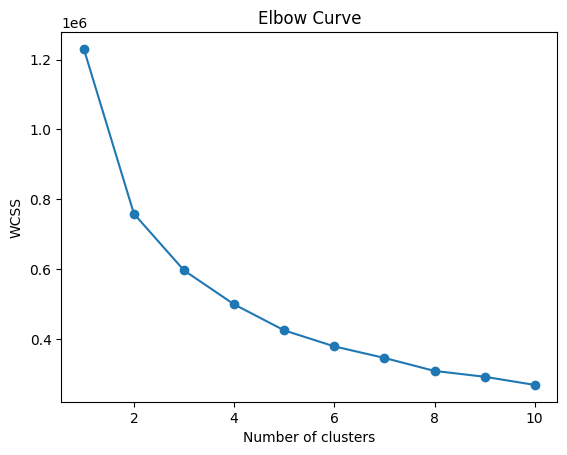

In [25]:
max_clusters = 10  # Maximum number of clusters to consider
wcss = find_optimal_clusters(final_df, max_clusters)
plot_elbow_curve(wcss, max_clusters)

In [26]:
optimal_num_clusters = 3  # Example: Using 3 clusters based on the Elbow Method
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=42)
kmeans.fit(final_df)

KMeans(n_clusters=3, random_state=42)

In [27]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Print cluster centroids and labels
print("Cluster centroids:")
print(centroids)
print("\nCluster labels:")
print(labels)

Cluster centroids:
[[ 62.51455185  77.59088353  20.73781333  33.7205043 ]
 [ 18.02030532  24.85825579  12.06851409  10.49321392]
 [-19.3657565   -2.25842318   9.37971016   8.84268302]]

Cluster labels:
[2 2 1 1 1 2 1 1 1 1 2 2 1 2 2 2 1 1 1 1 1 2 2 1 1 1 2 0 1 1 1 2 1 0 1 2 1
 1 2 1 2 2 1 2 0 1 2 0 1 1 1 2 2 2 2 2 2 1 1 2 2 1 0 1 0 1 2 1 1 1 2 1 2 2
 2 0 1 0 1 1 2 2 1 0 1 1 1 2 2 2 2 1 2 2 2 2 1 1 0 1 2 2 2 1 2 1 1 0 1 2 1
 2 2 1 2 1 2 0 2 1 1 2 2 1 2 2 1 2 1 1 0 1 2 2 0 2 2 2 2 2 2 1 2 1 2 2 1 2
 2 1 2 1 1 1 1 1 2 2 2 1 2 1 2 1 2 1 2 2 0 2 2 2 2 2 1 1 2 2 1 1 1 1 1 2 2
 1 0 2 2 2 2 2 2 0 2 1 1 0 2 1 2 1 2 2 2 1 1 2 1 1 1 0 1 2 2 1 2 1 1 1 1 2
 2 1 2 2 2 1 2 0 2 0 1 1 1 2 2 2 2 1 1 2 2 2 2 1 0 1 1 1 2 2 1 0 2 2 2 2 1
 2 2 2 2 2 2 0 2 1 2 2 1 1 1 0 2 1 1 2 0 1 2 2 0 0 2 1 1 1 2 1 2 0 1 1 1 0
 1 1 2 2 0 1 2 2 2 1 1 2 1 2 1 2 0 0 1 2 1 1 1 1 1 2 2 2 1 1 2 1 2 2 1 2 2
 1 1 1 2 1 2 1 0 0 1 1 1 2 1 1 1 1 1 1 1 1 0 2 2 2 0 1 2 2 2 1 2 1 0 0 1 2
 2 2 1 1 2 2 2 2 1 2 0 1 0 1 2 2 2 0 2 1 2 2 1 1

In [28]:
#assign labels/clusters - than categorize the tickers and analyze each group and share the findings
final_df['cluster'] = labels

In [29]:
final_df['Classify'] = final_df['cluster'].apply(lambda x: 'up' if x == 0 else ('flat' if x == 1 else 'down'))

In [30]:
print(final_df)

           Pct_2y     Pct_1y     Pct_3m    Pct_30d  cluster Classify
Ticker                                                              
A       -9.917198  -9.060342  23.273677  11.655434        2     down
AAL    -26.720001   6.837607   6.292283   1.510000        2     down
AAPL     6.988504  41.944166  11.911238   3.155975        1     flat
ABBV    23.698204  -0.909353   5.072859  16.314117        1     flat
ABNB   -21.160525  47.257026  -0.835095   9.659996        1     flat
...           ...        ...        ...        ...      ...      ...
XYL      0.397309   5.212408  23.646218  10.828415        2     down
YUM     -0.624632   2.614198   4.920961   5.114403        2     down
ZBH     -1.357426  -4.821367   8.483996   7.991753        2     down
ZBRA   -53.188906   4.855260  13.625084  36.709991        2     down
ZTS    -14.270961  29.009237  12.951178  21.531158        2     down

[497 rows x 6 columns]


In [31]:
print(final_df[final_df['Classify']=='up'])

            Pct_2y      Pct_1y     Pct_3m    Pct_30d  cluster Classify
Ticker                                                                
AMD      -1.883654   92.351564  36.985690  23.560005        0       up
ANET     65.572262  108.332537  27.171681  16.209991        0       up
AVGO     77.647656  116.000031  33.355377  96.996758        0       up
AXON     68.986717   89.630829  29.625552  32.469986        0       up
BKNG     44.112751   84.135060  14.951143  96.996758        0       up
BLDR     99.952098  133.224492  31.073863  32.050003        0       up
CAH     100.139226   47.142703  17.657395  -3.956230        0       up
CAT      49.186164   34.413830   8.862681  46.006866        0       up
CDNS     48.706044   67.333252  16.298481  -2.839996        0       up
CMG      35.269444   64.151781  24.018555  96.996758        0       up
COST     20.829613   42.820152  20.630069  85.165710        0       up
CTAS     45.075384   38.955160  25.074491  53.460571        0       up
DECK  

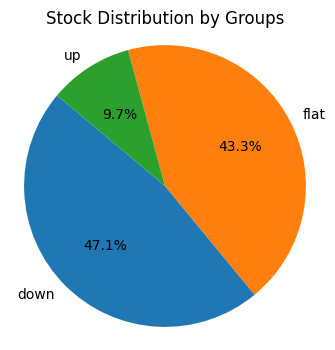

In [44]:
# Getting count of stocks by different groups
cat_size = final_df.groupby('Classify').size()
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
plt.pie(cat_size, labels=cat_size.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title('Stock Distribution by Groups')
plt.show()

In [45]:
final_df.groupby('Classify').size()

Classify
down    234
flat    215
up       48
dtype: int64

In [ ]:
#48 Tickers trended Upwards
#215 Tickers remained flat
#234 Tickers trended down

In [75]:
unique_labels = np.unique(final_df['Classify'])
print("Unique labels:", unique_labels)

Unique labels: ['down' 'flat' 'up']


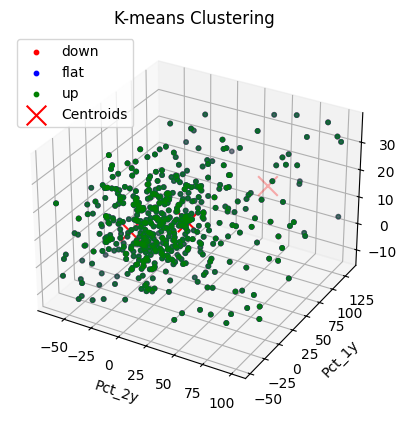

In [46]:
# Clusters plot

fig = plt.figure()
ax = fig.add_subplot( projection='3d')

label_colors = {'up': 'green', 'flat': 'blue', 'down': 'red'}

# Plot data points with different colors for each cluster
for label in np.unique(final_df['Classify']):
    ax.scatter( final_df['Pct_2y'], final_df['Pct_1y'], final_df['Pct_3m'],c=label_colors[label],label=f'{label}', s=10)

# Plot cluster centroids
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='x', s=200, label='Centroids')

# Set labels and title
ax.set_xlabel('Pct_2y')
ax.set_ylabel('Pct_1y')
ax.set_zlabel('Pct_3m')
ax.set_title('K-means Clustering')

# Add legend
ax.legend()

# Show plot
plt.show()



In [48]:
# Merging the stocks info with the stocks metrics & clusters data frame
merged_df = pd.merge(final_df, ticker_info, on='Ticker', how='left')

In [49]:
print(merged_df)

    Ticker     Pct_2y     Pct_1y     Pct_3m    Pct_30d  cluster Classify  \
0        A  -9.917198  -9.060342  23.273677  11.655434        2     down   
1      AAL -26.720001   6.837607   6.292283   1.510000        2     down   
2     AAPL   6.988504  41.944166  11.911238   3.155975        1     flat   
3     ABBV  23.698204  -0.909353   5.072859  16.314117        1     flat   
4     ABNB -21.160525  47.257026  -0.835095   9.659996        1     flat   
..     ...        ...        ...        ...        ...      ...      ...   
492    XYL   0.397309   5.212408  23.646218  10.828415        2     down   
493    YUM  -0.624632   2.614198   4.920961   5.114403        2     down   
494    ZBH  -1.357426  -4.821367   8.483996   7.991753        2     down   
495   ZBRA -53.188906   4.855260  13.625084  36.709991        2     down   
496    ZTS -14.270961  29.009237  12.951178  21.531158        2     down   

                Sector                                Industry  
0           Healthcare

In [50]:
print(merged_df.groupby(['Classify','Sector']).size())

Classify  Sector                
down      Basic Materials            9
          Communication Services    11
          Consumer Cyclical         27
          Consumer Defensive        27
          Energy                     1
          Financial Services        25
          Healthcare                45
          Industrials               21
          Real Estate               23
          Technology                24
          Utilities                 21
flat      Basic Materials           12
          Communication Services    10
          Consumer Cyclical         21
          Consumer Defensive         7
          Energy                    20
          Financial Services        40
          Healthcare                15
          Industrials               37
          Real Estate                7
          Technology                38
          Utilities                  8
up        Basic Materials            1
          Communication Services     1
          Consumer Cyclical    

In [ ]:
# The categorisation shows that stocks belonging to different sector are part of these clusters

In [53]:
grp1= merged_df.groupby(['Classify','Sector']).size()

In [54]:
grp1.unstack(0)

Classify,down,flat,up
Sector,,,
Basic Materials,9.0,12.0,1.0
Communication Services,11.0,10.0,1.0
Consumer Cyclical,27.0,21.0,10.0
Consumer Defensive,27.0,7.0,1.0
Energy,1.0,20.0,2.0
Financial Services,25.0,40.0,NaN
Healthcare,45.0,15.0,4.0
Industrials,21.0,37.0,14.0
Real Estate,23.0,7.0,1.0


In [55]:
#Up cluster statistics
desc_df = final_df[final_df["Classify"] == 'up'].describe()

# add the standard deviation metric
desc_df.loc['+3_std'] = desc_df.loc['mean'] + (desc_df.loc['std'] * 3)
desc_df.loc['-3_std'] = desc_df.loc['mean'] - (desc_df.loc['std'] * 3)

# display it
desc_df

,Pct_2y,Pct_1y,Pct_3m,Pct_30d,cluster
count,48.000000,48.000000,48.000000,48.000000,48.0
mean,62.236877,76.691362,20.490415,33.976470,0.0
std,27.813285,33.040539,10.427426,32.507362,0.0
min,-1.883654,27.800379,-1.510065,-8.924377,0.0
25%,43.107316,51.544484,13.603491,9.183008,0.0
50%,65.915729,67.322664,18.750101,23.270351,0.0
75%,84.212451,95.785293,29.264264,54.067932,0.0
max,100.139226,133.224492,36.985690,96.996758,0.0
+3_std,145.676731,175.812979,51.772693,131.498555,0.0
-3_std,-21.202977,-22.430256,-10.791863,-63.545614,0.0


In [56]:
#flat cluster statistics
desc_df = final_df[final_df["Classify"] == 'flat'].describe()

# add the standard deviation metric
desc_df.loc['+3_std'] = desc_df.loc['mean'] + (desc_df.loc['std'] * 3)
desc_df.loc['-3_std'] = desc_df.loc['mean'] - (desc_df.loc['std'] * 3)

# display it
desc_df

,Pct_2y,Pct_1y,Pct_3m,Pct_30d,cluster
count,215.000000,215.000000,215.000000,215.000000,215.0
mean,17.725565,24.829309,12.110524,10.417042,1.0
std,21.751185,19.595347,10.271760,15.414104,0.0
min,-21.160525,-26.375693,-12.347622,-20.902205,1.0
25%,1.983630,11.893817,6.392777,2.066477,1.0
50%,14.826426,23.744507,12.429138,5.619995,1.0
75%,29.211639,36.589721,18.611395,15.938156,1.0
max,96.157569,94.319214,36.985690,88.309998,1.0
+3_std,82.979121,83.615349,42.925805,56.659355,1.0
-3_std,-47.527991,-33.956732,-18.704756,-35.825271,1.0


In [57]:
#down cluster statistics
desc_df = final_df[final_df["Classify"] == 'down'].describe()

# add the standard deviation metric
desc_df.loc['+3_std'] = desc_df.loc['mean'] + (desc_df.loc['std'] * 3)
desc_df.loc['-3_std'] = desc_df.loc['mean'] - (desc_df.loc['std'] * 3)

# display it
desc_df

,Pct_2y,Pct_1y,Pct_3m,Pct_30d,cluster
count,234.000000,234.000000,234.000000,234.000000,234.0
mean,-19.387905,-2.388546,9.343321,8.753848,2.0
std,17.877746,15.815351,10.589598,12.749278,0.0
min,-62.876026,-44.830287,-12.347622,-20.902205,2.0
25%,-32.189928,-10.379446,1.872726,1.683720,2.0
50%,-16.081038,-2.297192,8.446350,4.907612,2.0
75%,-5.135469,7.641279,16.138094,11.148779,2.0
max,14.001216,51.175756,36.985690,96.996758,2.0
+3_std,34.245333,45.057507,41.112114,47.001683,2.0
-3_std,-73.021143,-49.834598,-22.425473,-29.493986,2.0


In [ ]:
# End of Analysis

In [94]:
# Additional approach tried for clustering

In [50]:
from sklearn.cluster import KMeans
from sklearn import metrics

# define a dictionary that contains all of our relevant info.
results_dict = {}

# define how many clusters we want to test up to.
num_of_clusters = 10

# run through each instance of K
for k in range(2, num_of_clusters):
    
    print("-"*100)
    
    # define the next dictionary to hold all the results of this run.
    results_dict[k] = {}

    # create an instance of the model, and fit the training data to it.
    kmeans = KMeans(n_clusters=k, random_state=0).fit(aggregated_df)
    
    # define the silhouette score
    sil_score = metrics.silhouette_score(aggregated_df, kmeans.labels_, metric='euclidean')
    
    # store the different metrics
    results_dict[k]['silhouette_score'] = sil_score
    results_dict[k]['inertia'] = kmeans.inertia_
    results_dict[k]['score'] = kmeans.score
    results_dict[k]['model'] = kmeans
    
    # print the results    
    print("Number of Clusters: {}".format(k))
    print('Silhouette Score:', sil_score)

----------------------------------------------------------------------------------------------------
Number of Clusters: 2
Silhouette Score: 0.9230399159287154
----------------------------------------------------------------------------------------------------
Number of Clusters: 3
Silhouette Score: 0.4954593948920245
----------------------------------------------------------------------------------------------------
Number of Clusters: 4
Silhouette Score: 0.29149020788478763
----------------------------------------------------------------------------------------------------
Number of Clusters: 5
Silhouette Score: 0.27579738370740103
----------------------------------------------------------------------------------------------------
Number of Clusters: 6
Silhouette Score: 0.26545314792774866
----------------------------------------------------------------------------------------------------
Number of Clusters: 7
Silhouette Score: 0.27086236630075133
------------------------------------

----------------------------------------------------------------------------------------------------


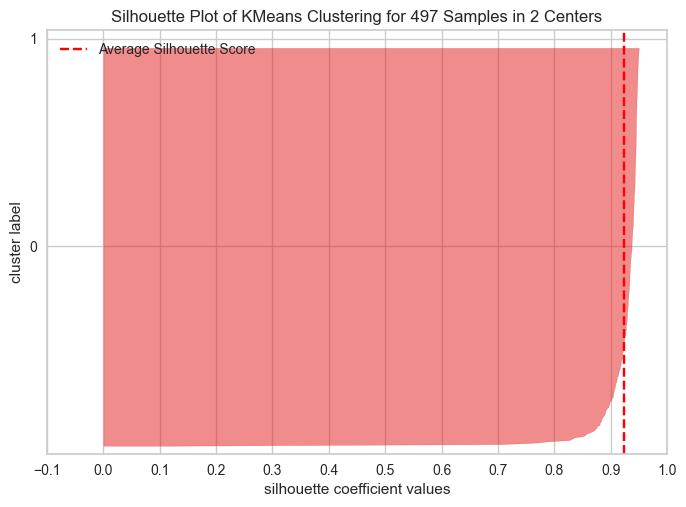

----------------------------------------------------------------------------------------------------


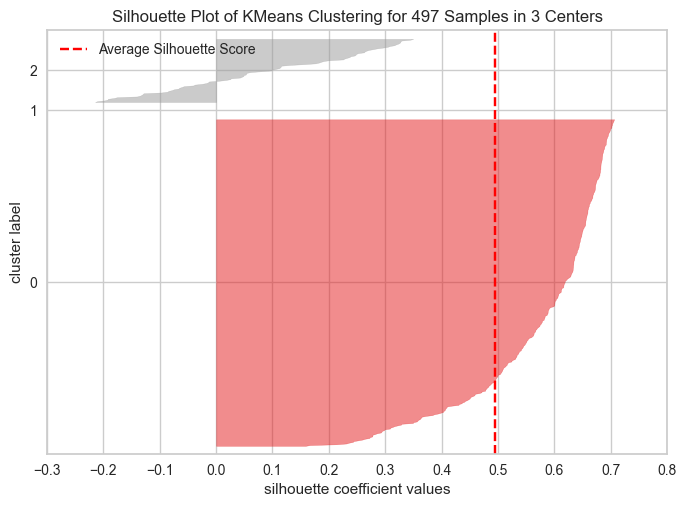

In [52]:
from yellowbrick.cluster import SilhouetteVisualizer

clusters = [2,3]

for cluster in clusters:
    
    print('-'*100)

    # define the model for K
    kmeans = KMeans(n_clusters = cluster, random_state=0)

    # pass the model through the visualizer
    visualizer = SilhouetteVisualizer(kmeans)

    # fit the data
    visualizer.fit(aggregated_df)

    # show the chart
    visualizer.poof()

In [ ]:
#Thank You for reviewing the Code!